## Requirements


In [1]:
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.optimizers import *
import os
from keras.models import load_model
import seaborn as sns 
from keras import metrics

import numpy as np
#Analiz görselleştrime için;
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


## Get Images

In [2]:
DATADIR = "C:\\Users\\fbalt\\Desktop\\FinalTeziGelistirme"
CATEGORIES = ["dog","cat","motorbike","carimages","ImagesPs"]
inputData = np.array([])
output = np.ndarray(shape=(0,len(CATEGORIES)),dtype=int)
img_size=184

for category in CATEGORIES:
    classNum = CATEGORIES.index(category)
    out = np.zeros((1,len(CATEGORIES)))
    out[0][classNum] = 1
    path = os.path.join(DATADIR, category)
    for img in os.scandir(path):
        image = cv2.imread(os.path.join(path,img)) 
        newImg = cv2.resize(image,(img_size,img_size))
        inputData = np.append(inputData,newImg)
        output = np.append(output,out, axis=0)
        



print(inputData.shape)

inputData=np.reshape(inputData,(-1,img_size,img_size,3))
np.save("inputs",inputData)
np.save("outputs",output)
#https://stackoverflow.com/questions/50306863/valueerror-cannot-reshape-array-of-size-50176-into-shape-1-224-224-3
print(inputData.shape)
print(output.shape)

KeyboardInterrupt: 

## Inputs and Outputs Define

In [2]:
inputData=np.load("inputs.npy");
outputData=np.load("outputs.npy");

In [3]:
print(inputData.shape)
print(outputData)
print(outputData.shape)

(3160, 184, 184, 3)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(3160, 5)


## Definition Validation Split Data

In [ ]:
DATADIR = "C:\\Users\\fbalt\\Desktop\\FinalTeziGelistirme\\testImages"
CATEGORIES = ["testDog","testCat","testMotorbike","testCar","testPs"]
splitInput = np.array([])
splitOutput = np.ndarray(shape=(0,len(CATEGORIES)),dtype=int)
img_size=184

for category in CATEGORIES:
    classNum = CATEGORIES.index(category)
    out = np.zeros((1,len(CATEGORIES)))
    out[0][classNum] = 1
    path = os.path.join(DATADIR, category)
    for img in os.scandir(path):
        image = cv2.imread(os.path.join(path,img)) 
        newImg = cv2.resize(image,(img_size,img_size))
        splitInput = np.append(splitInput,newImg)
        splitOutput = np.append(splitOutput,out, axis=0)
        
    
    

splitInput=np.reshape(splitInput,(-1,img_size,img_size,3))

np.save("splitInputs",splitInput)
np.save("splitOutputs",splitOutput)





In [3]:
splitInput=np.load("splitInputs.npy");
splitOutput=np.load("splitOutputs.npy");
print(splitInput.shape)
print(splitOutput.shape)

(539, 184, 184, 3)
(539, 5)


## Create Model


In [37]:
img_size=184

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(img_size,img_size,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5))
model.add(Activation('softmax'))


model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()
inputData = inputData.reshape((-1,img_size, img_size, 3))

k=model.fit(inputData/255,outputData,batch_size=32,epochs=50,validation_data=(splitInput,splitOutput))

trainLoss=k.history['loss']
valLoss=k.history['val_loss']
trainAcc=k.history['acc']
valAcc=k.history['val_acc']


from numpy import save


save('trainLossForEpoch50.npy', trainLoss)
save('valLoss50.npy', valLoss)
save('trainAcc50.npy', trainAcc)
save('valAcc50.npy', valAcc)

model.save("fourthModelEpoch10")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 182, 182, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 91, 91, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 89, 89, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 42, 42, 64)        36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 112896)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                7225408   
__________

In [54]:
from numpy import load

trainLoss=load('trainLossForEpoch50.npy')
valLoss=load('valLoss50.npy')
trainAcc=load('trainAcc50.npy')
valAcc=load('valAcc50.npy')


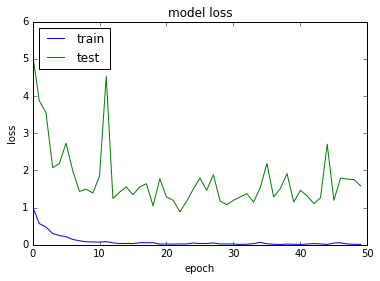

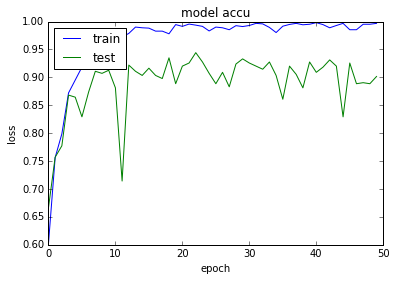

In [55]:



#new trainLoss plotting

plt.plot(newTrainLoss)
plt.plot(newValLoss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#

plt.plot(trainAcc)
plt.plot(valAcc)
plt.title('model accu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#


## Prediction Part

In [7]:
model = load_model("thirdModelEpoch50")
DATADIR = "C:\\Users\\fbalt\\Desktop\\FinalTeziGelistirme\\predictImages"
CATEGORIES = ["testDog","testCat","testMotorbike","testCar","testPs"]
predictInputData = np.array([])
predictResult = np.array([])
predictOutput = np.ndarray(shape=(0,len(CATEGORIES)),dtype=int)
img_size=184

for category in CATEGORIES:
    classNum = CATEGORIES.index(category)
    out = np.zeros((1,len(CATEGORIES)))
    out[0][classNum] = 1
    path = os.path.join(DATADIR, category)
    for img in os.scandir(path):
        image = cv2.imread(os.path.join(path,img)) 
        newImg = cv2.resize(image,(img_size,img_size))
        predictInputData = np.append(predictInputData,newImg)
        predictOutput = np.append(predictOutput,out, axis=0)
        

        
predictInputData=np.reshape(predictInputData,(-1,img_size,img_size,3))
        
np.save("testOutput",predictOutput)
np.save("testInputData",predictInputData)



p=model.predict(predictInputData)
print(p ,"beklenen",predictOutput)
print(len(p))
print(len(predictOutput))
np.set_printoptions(threshold=np.nan)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] beklenen [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
547
547


## Tahmin Verilerinin Düzenlenmesi 

In [22]:
sonucPredictDuzenleme=[]
beklenensonucDuzenleme=[]
for i in range(len(p)):
    for k in range(0,5):
        if p[i][k] == 1:
            sonucPredictDuzenleme.append(k)
                 
for c in range(0,4):
    sonucPredictDuzenleme.append(4)
          
for m in range(len(p)):
    for n in range(0,5):
        if predictOutput[m][n] > 0:
            beklenensonucDuzenleme.append(n)




4


AttributeError: 'Sequential' object has no attribute 'history'

## Hata Matrisi

In [38]:
import numpy as np
#Analiz görselleştrime için;
import matplotlib.pyplot as plt
%matplotlib inline
#analizler için
from sklearn.metrics import confusion_matrix


#confusion 
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, [0,1,2,3,4,5])
    plt.yticks(tick_marks, [0,1,2,3,4,5])
    plt.tight_layout()
    plt.ylabel('Beklenen Değerler')
    plt.xlabel('Tahmini Değerler')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 

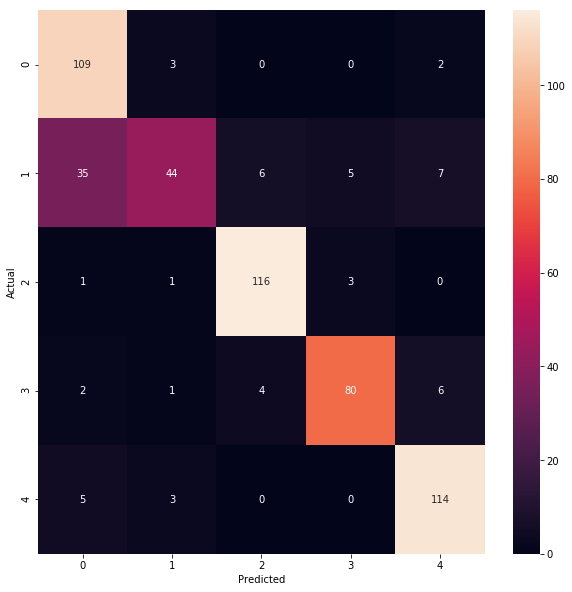

In [40]:
print(beklenensonucDuzenleme)
print(sonucPredictDuzenleme)
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(beklenensonucDuzenleme, sonucPredictDuzenleme)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Kaynakça